In [1]:
import re
import warnings
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

from utils import quick_load_liuzhong_health_check_data
from plot_utils import Stack, Scatter, Sankey, BxxPvalue

%matplotlib inline
%load_ext autoreload
%autoreload 2

warnings.filterwarnings("ignore")

df_table1plus, l_consecute_man2p, l_consecute_man3p, df_table1plus_3p_revMM, df_meta_group, rename_dict = quick_load_liuzhong_health_check_data()
workdir = "/cluster/home/bqhu_jh/projects/healthman/analysis/liuzhong/human/clinical/figures"

## Overview for liver

100%|██████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 11.09it/s]


len                                                 mean  \
month            1     2     3     4     5     6    11    12          1   
period                                                                    
Control-2021  1404  3072  2291  2040  3003  1735  1595   476   8.035969   
Control-2022    80   271  1487  2011  2978  1735  1723   248   8.251250   
Test-2023       69   234  1493  2055  2984  1707  1754   263   8.845652   
Control-2021  1699  3972  3083  2838  3830  2606  2224  1008  17.378164   
Control-2022  1697  3982  3087  2835  3836  2607  2224  1009  18.448144   
Test-2023     1696  3979  3089  2836  3836  2611  2219  1010  20.450767   
Control-2021   482  1173  1015  1617  2511  1842   879   649  18.953320   
Control-2022   294   680   949  1645  2555  1828   779   635  20.443878   
Test-2023      322   706  1017  1674  2583  1842   747   639  20.762422   
Control-2021   269   595   891  1588  2483  1827   842   618   8.122305   
Control-2022   281   628   920  1615  2470  1712   715   606   7.836299   
Test-2023      312   663   939  1637  2498  1725   711   608   8.524038   
Control-2021   469  1123   997  1590  2484  1829   842   619  74.043710   
Control-2022   282   631   920  1615  2470  1712   715   606  78.074468   
Test-2023      312   663   939  1637  2498  1725   711   608  72.195513   
Control-2021   269   595   891  1588  2483  1827   842   618  20.612639   
Control-2022   281   628   920  1615  2470  1712   715   606  20.524555   
Test-2023      312   663   939  1637  2498  1725   711   608  21.661699   
Control-2021  1699  3972  3082  2838  3830  2606  2224  1008  10.910742   
Control-2022  1697  3982  3087  2835  3836  2607  2224  1009  10.657985   
Test-2023     1696  3979  3089  2836  3836  2611  2219  1010  10.923320   
Control-2021  1699  3972  3082  2838  3830  2606  2224  1008   3.837581   
Control-2022  1697  3982  3087  2835  3836  2607  2224  1009   3.894755   
Test-2023     1696  3979  3089  2836  3836  2611  2219  1010   3.899646   
Control-2021  1699  3971  3082  2838  3830  2606  2224  1008   7.073161   
Control-2022  1696  3980  3085  2834  3836  2607  2195   999   6.763620   
Test-2023     1696  3977  3087  2630  3828  2591  2217  1010   7.023673   
Control-2021   469  1120   997  1590  2484  1829   842   619   4.464499   
Control-2022   282   631   920  1615  2470  1712   715   606   4.605674   
Test-2023      312   663   939  1637  2498  1725   711   608   5.121955   
Control-2021  1699  3967  3083  2838  3829  2606  2224  1008  65.839612   
Control-2022  1697  3978  3087  2835  3835  2607  2224  1009  64.520330   
Test-2023     1696  3975  3089  2836  3835  2611  2219  1010  63.413325   

                         ...   func_q5  func_q95                               \
month                 2  ...        12         1         2        3         4   
period                   ...                                                    
Control-2021   8.679167  ...   4.32375   2.80000   3.01745   3.3755   3.50000   
Control-2022   8.927860  ...   3.23585   4.07545   4.03900   5.0117   5.20000   
Test-2023     10.183333  ...   4.42620   5.56460   5.30000   5.4000   5.50000   
Control-2021  17.885574  ...   3.00000   5.00000   4.72450   5.0000   6.00000   
Control-2022  18.775866  ...   2.00800   5.00000   5.00000   6.0000   6.00000   
Test-2023     19.546997  ...   2.50450   5.00000   4.00000   5.0000   6.00000   
Control-2021  19.411338  ...   9.32400  11.00000  10.00000  11.0000  11.00000   
Control-2022  20.466912  ...  10.00000  11.00000  11.00000  11.0000  11.00000   
Test-2023     20.865439  ...   8.00000  11.00000  12.00000  11.0000  11.00000   
Control-2021   8.686050  ...   4.69255   5.16380   5.00000   4.7455   4.90000   
Control-2022   8.398089  ...   4.00000   5.00000   5.00000   5.0000   5.00000   
Test-2023      8.832579  ...   5.00000   5.00000   5.00000   5.0000   5.00000   
Control-2021  75.315227  ...  24.94400  45.00000  43.00000  43.9240  43.09550   
Control-2022  78.9

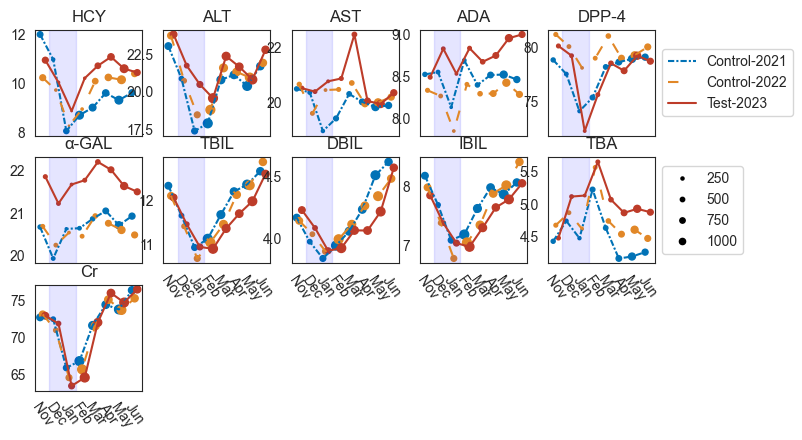

In [2]:
l_tags = list(df_meta_group[df_meta_group["combined_item_name_en"].isin(["BioChem-Liver", "BioChem-Metabolism"])]["item_id"])
l_tags = l_tags[0:3]+l_tags[4:]

l_months = [11,12,1,2,3,4,5,6]
plt_scatter = Scatter(n_cols=5, figsize=(8,8), n_rows=5, rename_dict=rename_dict)

fig, df_res = plt_scatter.plot_scatter(df_table1plus_3p_revMM, l_tags, order=l_months)
fig.savefig(f"{workdir}/Figure6_A.pdf")
df_res

## Focus on ALT by months

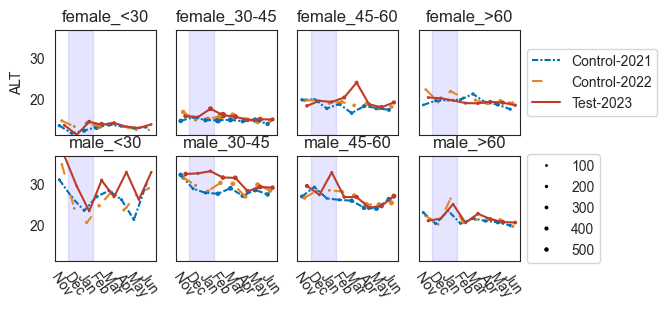

In [3]:
tag = "v0017"
plt_scatter = Scatter(n_cols=5, figsize=(6,3), n_rows=5, rename_dict=rename_dict)
fig,df_scatter_3p = plt_scatter.plot_scatter_ax_plus(df_table1plus_3p_revMM, tag, order=l_months)
fig.savefig(f"{workdir}/Figure6_D.pdf")

## Boxplot for TBIL

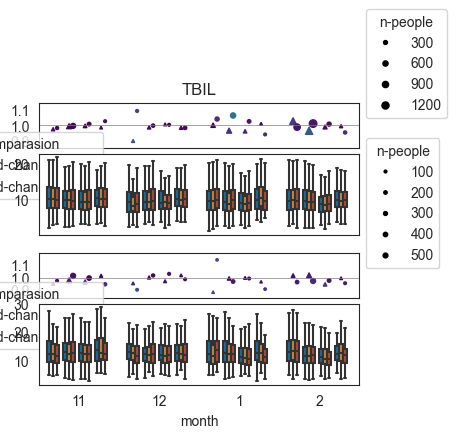

In [4]:
tag = "v0015"
plot_box = BxxPvalue(figsize=(4,3), rename_dict=rename_dict)
fig, df_scatter = plot_box.plot_bxxplot_pvalue(df_table1plus_3p_revMM, x="month", y=tag,
                                       hue_col_order=["female", "male"], order=[11,12, 1,2], sns_type="boxplot"
)
fig.savefig(f"{workdir}/Figure6_E.pdf")

## Other plots

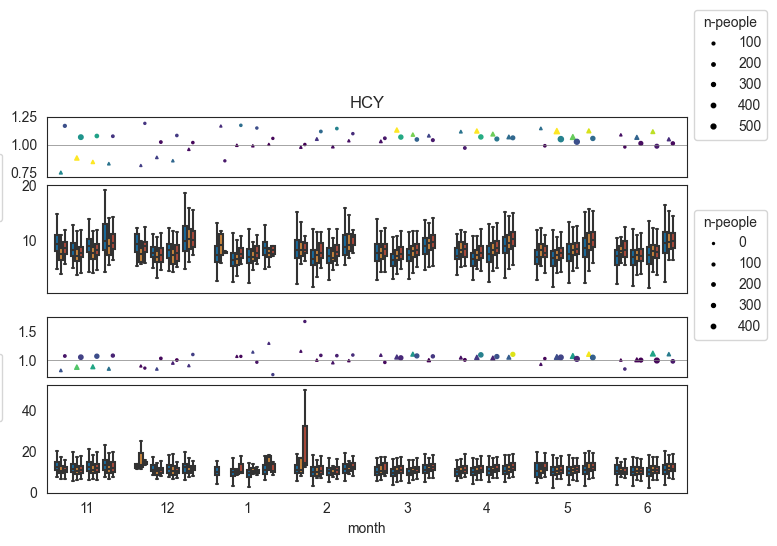

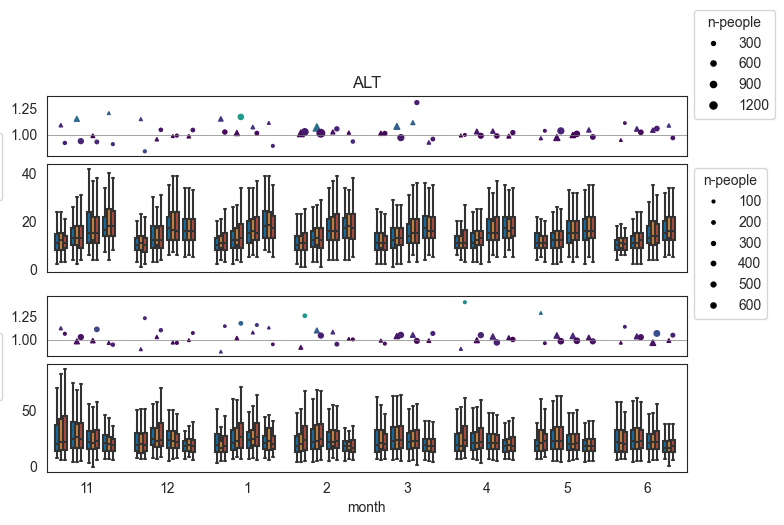

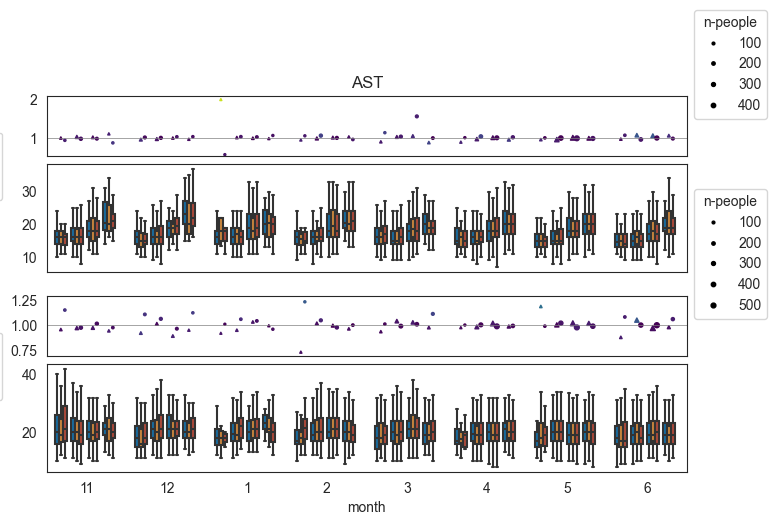

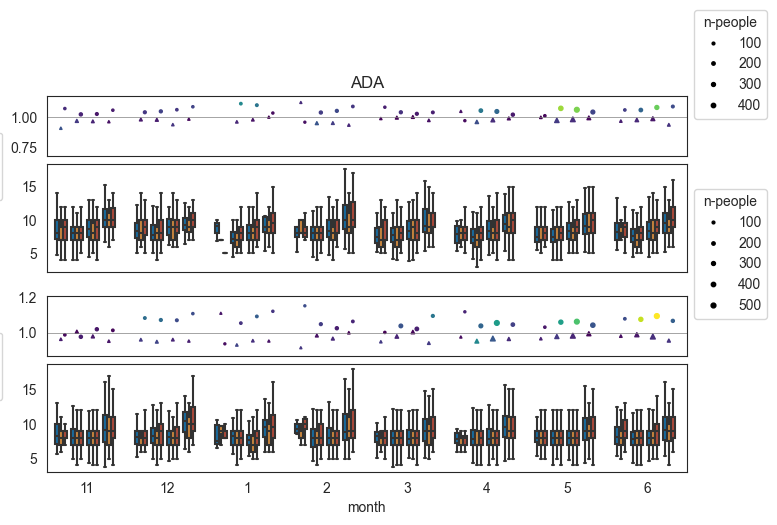

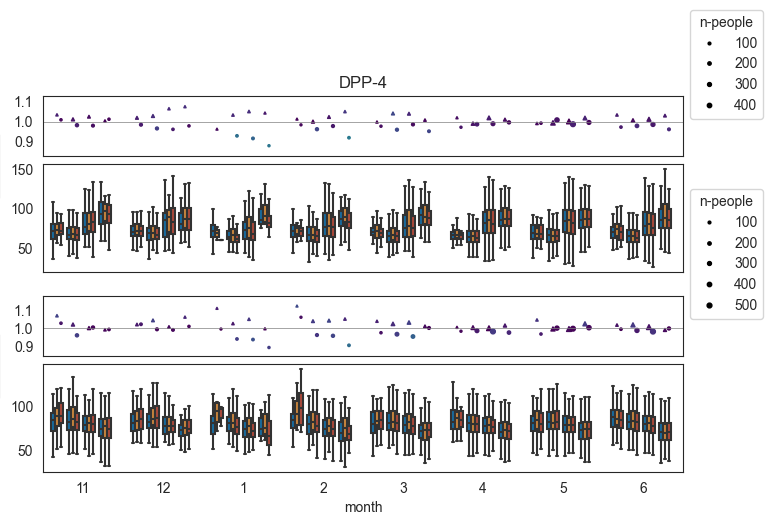

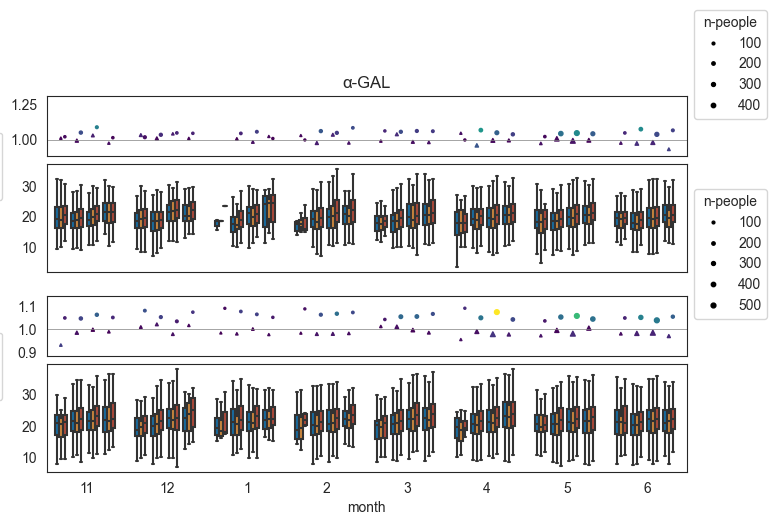

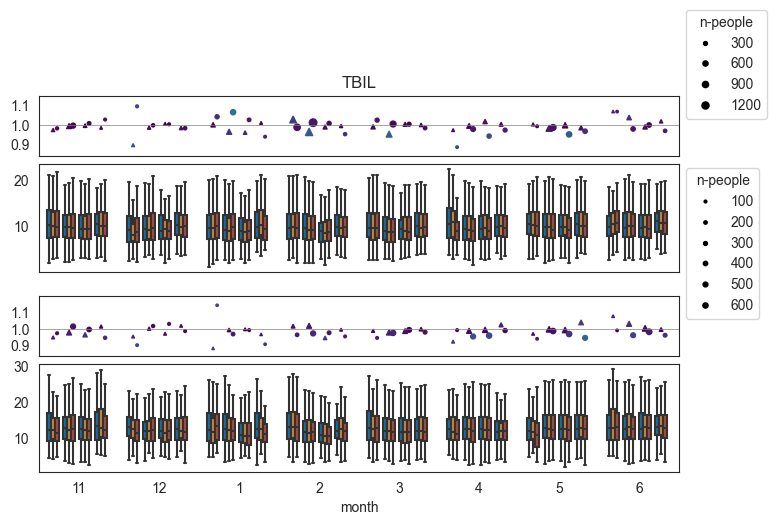

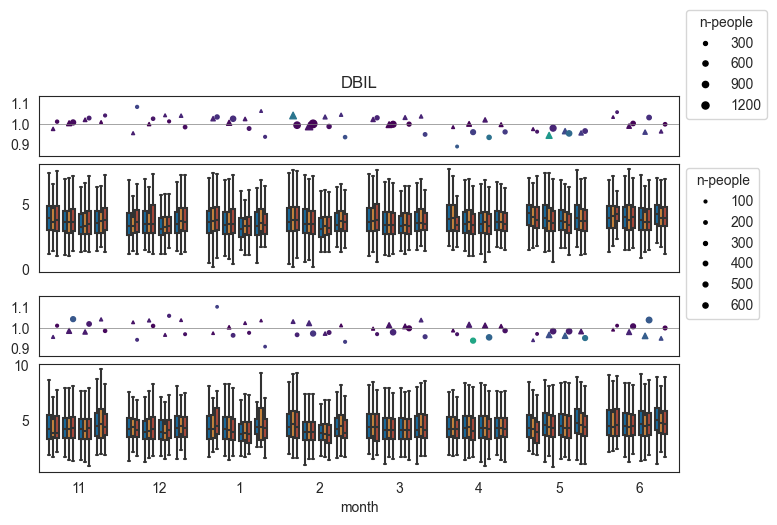

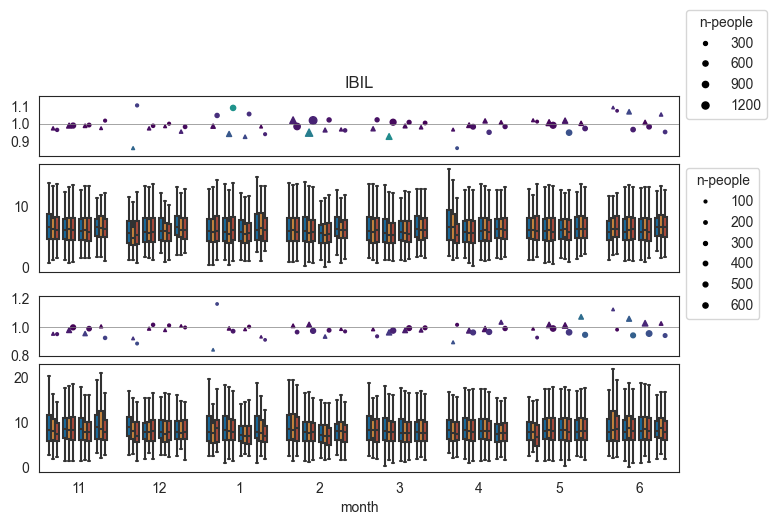

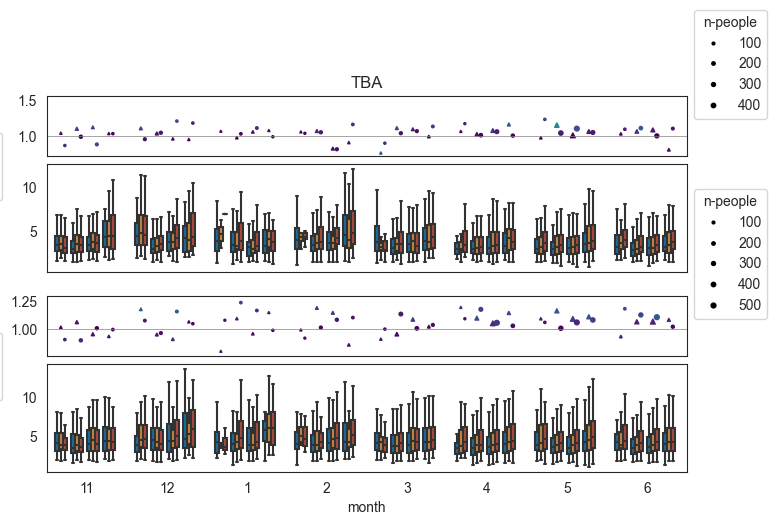

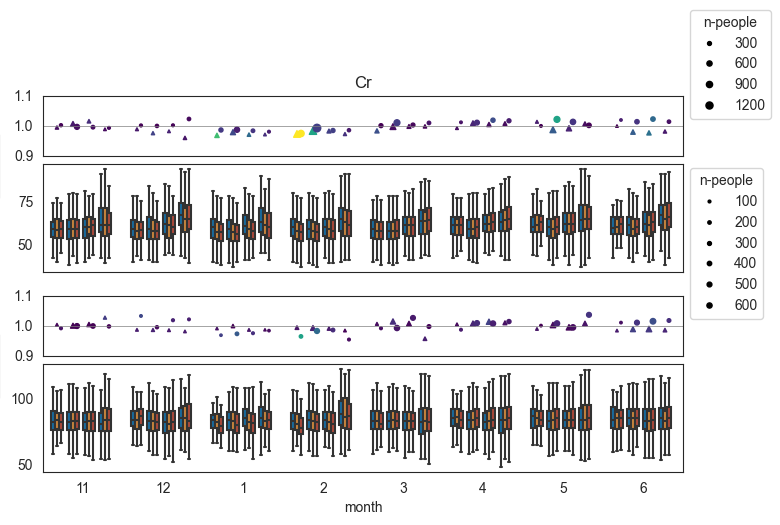

In [5]:
plot_box = BxxPvalue(figsize=(8,4), rename_dict=rename_dict)
for tag in l_tags:
    fig, _ = plot_box.plot_bxxplot_pvalue(df_table1plus_3p_revMM, x="month", y=tag,
                                       hue_col_order=["female", "male"], order=[11,12, 1,2,3, 4,5,6], sns_type="boxplot"
    )

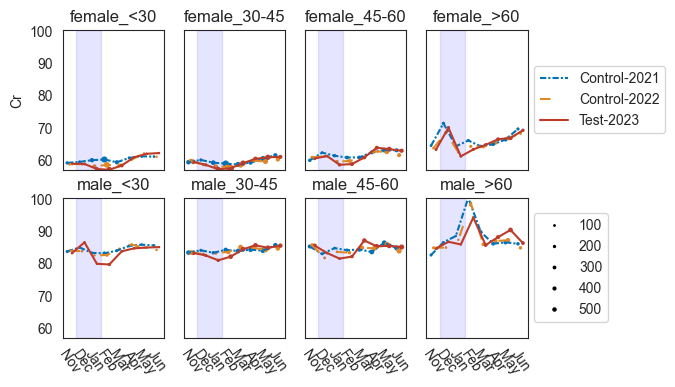

In [6]:
plt_scatter = Scatter(figsize=(6,4), rename_dict=rename_dict)
fig,df_scatter_3p = plt_scatter.plot_scatter_ax_plus(df_table1plus_3p_revMM, tag, order=l_months)